## Exploratory Data Analysis(EDA) With Python

Data analytics is concerned with examining,transforming and arranging raw data so that we can study, extract meaningful information and make inferences from it. Data analytics is a broad field that combines statistics, computer science and domain knowledge such as business knowledge to reach a goal. An easy way to understand data analytics is by examining its types. There are five(5) types of data analytics: 

- Descriptive concerned with determining what happened
- Diagonistic explains why things happen
- Predictive tries to show us what will happen in the future
- Prescriptive give insights on what actions should be taken to achieve a target
- Cognitive concerned with mimicking human cognitive capabilities such as self-learning, automatic decison making among others using data. 
 
A data analysis task may involve more than one of these types and is not limited to a particular goal. Sometimes, a data analysts may need guidiance in choosing the goal or target for the problem. **Exploratory data analysis(EDA)** involves understanding your dataset before deciding how best to manipulate it to get the answers you want.

EDA is used investigate the dataset and summarize their main characteristics. It shows what the data can reveal beyond the formal hypothesis testing task and provides a better understanding of the dataset variables and the relationship between them. It can help data analysts determine the best statistical techniques to use. EDA helps stakeholders by confirming they are asking the right questions. Once EDA is complete, its insight can then be used for further data analysis.

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

### Preparations

Python is an interpreted, object oriented programming language with dynamic typing and dynamic binding for rapid application development. It can be used as a scritpting language and has a rich set of open source libraries for data analysis. For example Pandas, Matplotlib, numpy among others. Having a good knowledge of the libraries will enable you understand this notebook. A great book for this is [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

To begin, We import the needed library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sets the backend of matplotlib to the inline backend
%matplotlib inline 

#Use style that emulates R ggplot aesthetics 
plt.style.use('ggplot')

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Load the dataset

Nothing can be done as a data analyst without having any data. In this instance, a dataset of covid-19 cases in New York is avaliable as a CSV file for our use. In some cases a data analyst is required to identify all the available dataset of the company and extract it into a usable format. At this point skills for working with data management systems are needed. These include knowledge of DBMS (MYSQL, MongoDB etc), Querying databases, retrieving unstructured data, distributed storage(Hadoop, Apache spark etc) among others.

**Pandas** is a popular package for data science that offers powerful and flexible data structures for holding data in memory. A dataset loaded into Pandas is primarily stored as a dataframe. A DataFrame is two dimensional labeled data structure with columns of different data types. It is made up of three parts: index, columns and data. A one-dimensional labeled array capable of any data type with axis or index is called a pandas series.

In [3]:
df=pd.read_csv("new-york-history.csv") #loads the data

##View the some recrods in the data set
df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-01,NY,38577.0,NaN,80,NaN,89995.0,89995.0,5307.0,0,...,38281073,174158,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,2021-02-28,NY,38497.0,NaN,90,NaN,89995.0,89995.0,5259.0,0,...,38106915,273720,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,2021-02-27,NY,38407.0,NaN,86,NaN,89995.0,89995.0,5445.0,0,...,37833195,285307,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,2021-02-26,NY,38321.0,NaN,94,NaN,89995.0,89995.0,5626.0,0,...,37547888,291189,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,2021-02-25,NY,38227.0,NaN,92,NaN,89995.0,89995.0,5703.0,0,...,37256699,278942,NaN,NaN,NaN,NaN,NaN,0,NaN,0


A view of the first 5 rows in the data shows us the column names and type of values in the data. This is a basic data exploration - seeing the values in your dataset and knowing the column names. From the table of a few records, there exist many records with NaNs. This tell says the data must cleaned before analysis. The dataset has many columns and intuitively, there is a question about the relevant features. The presence of date column also give insight that a better way to approach this dataset is by analysing trends.

First, get more details about Null values in the dataset. 

In [4]:
df.info() #Give us more information about individual columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              365 non-null    object 
 1   state                             365 non-null    object 
 2   death                             352 non-null    float64
 3   deathConfirmed                    1 non-null      float64
 4   deathIncrease                     365 non-null    int64  
 5   deathProbable                     0 non-null      float64
 6   hospitalized                      346 non-null    float64
 7   hospitalizedCumulative            346 non-null    float64
 8   hospitalizedCurrently             350 non-null    float64
 9   hospitalizedIncrease              365 non-null    int64  
 10  inIcuCumulative                   0 non-null      float64
 11  inIcuCurrently                    341 non-null    float64
 12  negative

### Data Cleaning
Data cleaning is the process of transforming your dataset to be fit for data analysis. It involves throwing away, replacing and/or filling missing valuse/errors. During data exploration, errors, missing values and/or currupt records present in the data are identified. For instance, only 15 columns have complete 365 data and the rest have NaN values. Some columns have about 70-95%, 50-69% of the total number of rows. Other contain items between 30% to 0% of the total number of records. We can decide to use just 15 columns with complete records or chose a valid percentage cut off for number of records and drop columns that do not reach the threshold. The latter option is employed here.

Also, notice that the data contains date column of data type object. The date column should be converted into a datetime type for easy usage during visualization. This can be done by using the parse_date parameter of read_csv() or using pd.to_datetime.

In [5]:
df.date=df['date'].apply(lambda _: pd.to_datetime(_, format='%Y/%m/%d'))

In [6]:
df2 = pd.read_csv("new-york-history.csv",
                  parse_dates=['date'], index_col=['date'])
df2.head()

,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,NY,38577.0,NaN,80,NaN,89995.0,89995.0,5307.0,0,NaN,...,38281073,174158,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2021-02-28,NY,38497.0,NaN,90,NaN,89995.0,89995.0,5259.0,0,NaN,...,38106915,273720,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2021-02-27,NY,38407.0,NaN,86,NaN,89995.0,89995.0,5445.0,0,NaN,...,37833195,285307,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2021-02-26,NY,38321.0,NaN,94,NaN,89995.0,89995.0,5626.0,0,NaN,...,37547888,291189,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2021-02-25,NY,38227.0,NaN,92,NaN,89995.0,89995.0,5703.0,0,NaN,...,37256699,278942,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-03-01 to 2020-03-02
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   state                             365 non-null    object 
 1   death                             352 non-null    float64
 2   deathConfirmed                    1 non-null      float64
 3   deathIncrease                     365 non-null    int64  
 4   deathProbable                     0 non-null      float64
 5   hospitalized                      346 non-null    float64
 6   hospitalizedCumulative            346 non-null    float64
 7   hospitalizedCurrently             350 non-null    float64
 8   hospitalizedIncrease              365 non-null    int64  
 9   inIcuCumulative                   0 non-null      float64
 10  inIcuCurrently                    341 non-null    float64
 11  negative                          0 non-null      fl

In [8]:
df3 = df2[[column for column in df2 if df2[column].count()/len(df2)>=0.3]]
#This uses list comprehension to remove columns that have less not null values than 30% of the total number of rows.
#count() method does not count null values

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-03-01 to 2020-03-02
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   state                             365 non-null    object 
 1   death                             352 non-null    float64
 2   deathIncrease                     365 non-null    int64  
 3   hospitalized                      346 non-null    float64
 4   hospitalizedCumulative            346 non-null    float64
 5   hospitalizedCurrently             350 non-null    float64
 6   hospitalizedIncrease              365 non-null    int64  
 7   inIcuCurrently                    341 non-null    float64
 8   negativeIncrease                  365 non-null    int64  
 9   onVentilatorCurrently             299 non-null    float64
 10  positive                          365 non-null    int64  
 11  positiveIncrease                  365 non-null    in

These are the relevant features that can provide insight on Covid-19 pandemic in Newyork. At this point, records with NaNs will be dropped to provide an even dataset to work with.

In [10]:
df3=df3.dropna() #drop all rows with null values

#display the size of the dataframe 
df3.shape

(299, 19)

### Exploration of the data
Here, the cleaned dataset is investigated to gain further understanding of each feature in it.

In [11]:
df3.describe() #this gives basic statistics information on each feature of the dataset 

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,positiveScore,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.0,299.000000,2.990000e+02,299.000000,299.0,2.990000e+02,299.000000,2.990000e+02,299.000000,299.0,299.0
mean,27321.672241,62.541806,89714.498328,89714.498328,3290.337793,28.177258,700.337793,0.0,455.581940,6.632892e+05,4390.307692,0.0,1.435444e+07,124498.836120,1.435444e+07,124498.836120,0.0,0.0
std,4166.191740,80.328859,1121.875286,1121.875286,3014.864131,98.373102,632.156475,0.0,478.763132,3.843383e+05,4803.051227,0.0,1.080926e+07,69600.538023,1.080926e+07,69600.538023,0.0,0.0
min,20828.000000,1.000000,82197.000000,82197.000000,410.000000,0.000000,109.000000,0.0,47.000000,3.274690e+05,391.000000,0.0,1.089916e+06,20463.000000,1.089916e+06,20463.000000,0.0,0.0
25%,25057.000000,8.500000,89995.000000,89995.000000,705.500000,0.000000,159.000000,0.0,82.500000,4.077535e+05,747.500000,0.0,5.197896e+06,66316.500000,5.197896e+06,66316.500000,0.0,0.0
50%,25505.000000,27.000000,89995.000000,89995.000000,1628.000000,0.000000,378.000000,0.0,212.000000,4.633600e+05,1598.000000,0.0,1.111029e+07,99761.000000,1.111029e+07,99761.000000,0.0,0.0
75%,28161.000000,112.000000,89995.000000,89995.000000,6089.000000,0.000000,1209.000000,0.0,796.500000,8.100120e+05,7779.000000,0.0,2.257866e+07,175894.000000,2.257866e+07,175894.000000,0.0,0.0
max,38577.000000,951.000000,89995.000000,89995.000000,9273.000000,627.000000,2976.000000,0.0,2425.000000,1.636680e+06,19942.000000,0.0,3.828107e+07,324671.000000,3.828107e+07,324671.000000,0.0,0.0


The table shows deaths have mean and std of 27,321 and 4166 respectively. These are very interesting figures that makes us interested in understanding the deaths more. # Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()Let's continue with an exploration of number of deaths from Covid-19 in New York

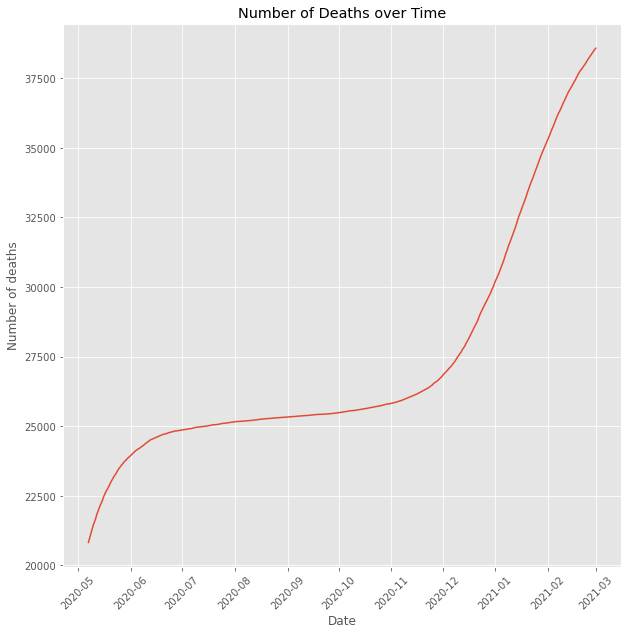

In [12]:
plt.figure(figsize=(10,10))
plt.plot(df3.index.values,df3['death'])
plt.title('Number of Deaths over Time')
plt.xlabel('Date')
plt.ylabel('Number of deaths')
# Rotate tick marks on x-axis
plt.xticks(rotation=45)
plt.show()

A sharp increase in number of deaths is observed from march 2020 to around April 2020 and then a gradual rise until late june. This is followed by a  constant daily death rate between July and late October 2020. Subsequently, a rise is observed from november 2020 to march 2021. We observe that there are two types of trends in the date rate in New York. A increase and static.

Let's view the distribution of the deaths to gain more insight into covid-19 deaths in new york

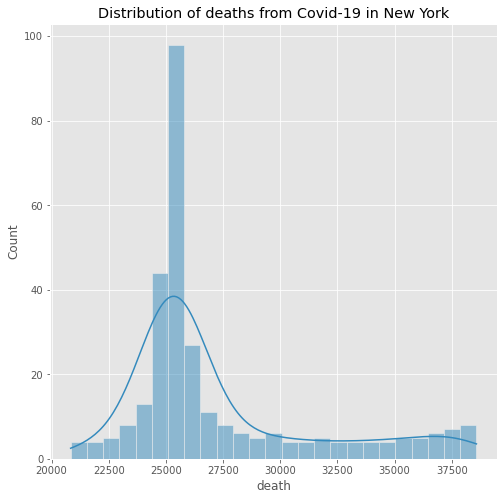

In [13]:
plt.figure(figsize=(8,8))
plt.title('Distribution of deaths from Covid-19 in New York')
sns.histplot(df3['death'],bins=25,kde="True")
plt.show()

The hsitogram shows a right skewed (positively) distribution. This is confrimed with the mean > median. 

#### Histograms of numerical Columns

Let's Plot the distributions of the other columns with numerical values as well.

In [14]:
df3.dtypes.tolist() #view the datatypes present in the dataset

[dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [15]:
df_num = df3.select_dtypes(include = ['float64', 'int64']) #create a dataframe of the numerical columns
df_num.head()

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,positiveScore,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,
2021-03-01,38577.0,80,89995.0,89995.0,5307.0,0,1065.0,0,741.0,1636680,6235,0,38281073,174158,38281073,174158,0,0
2021-02-28,38497.0,90,89995.0,89995.0,5259.0,0,1083.0,0,728.0,1630445,7580,0,38106915,273720,38106915,273720,0,0
2021-02-27,38407.0,86,89995.0,89995.0,5445.0,0,1121.0,0,753.0,1622865,8141,0,37833195,285307,37833195,285307,0,0
2021-02-26,38321.0,94,89995.0,89995.0,5626.0,0,1132.0,0,771.0,1614724,8204,0,37547888,291189,37547888,291189,0,0
2021-02-25,38227.0,92,89995.0,89995.0,5703.0,0,1124.0,0,774.0,1606520,8746,0,37256699,278942,37256699,278942,0,0


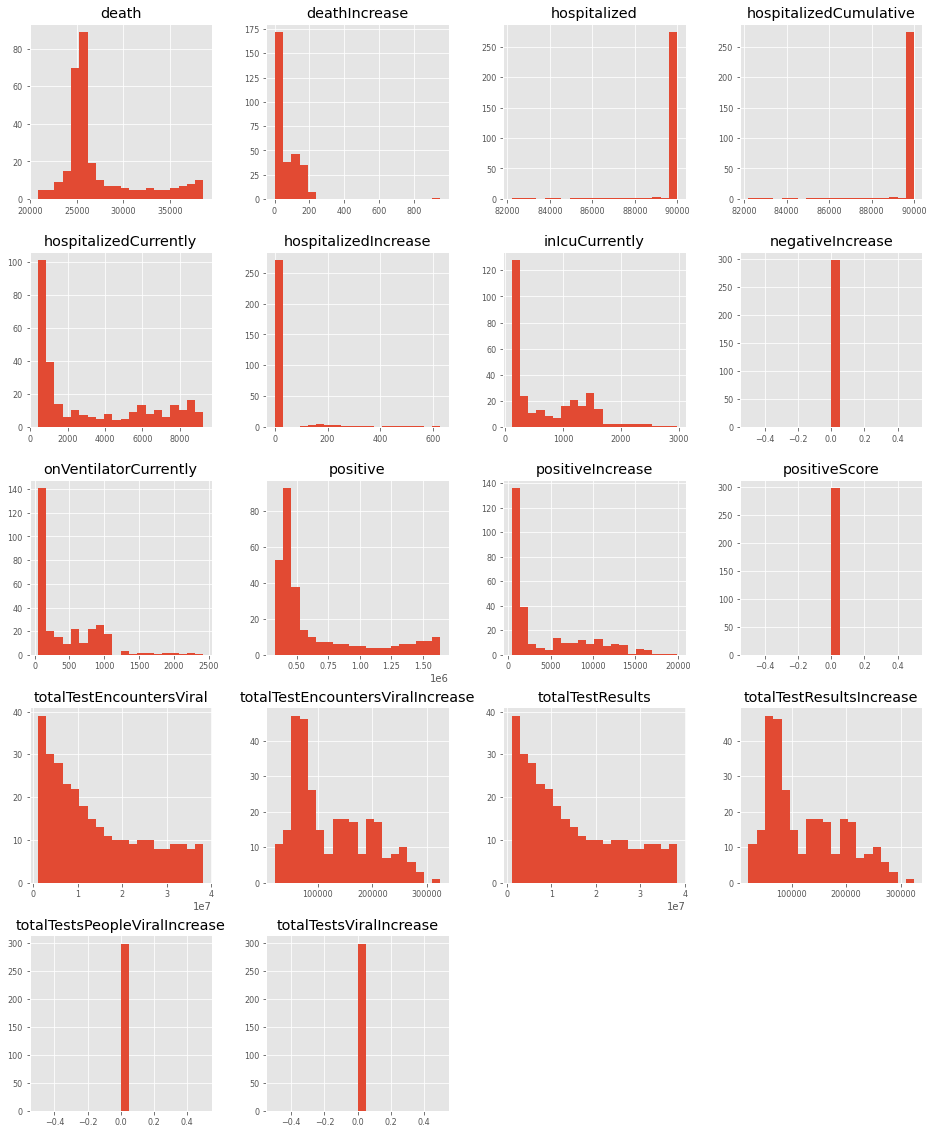

In [16]:
df_num.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

#### Calculate Correlation

Correlation is a measure of the strength of linear association between two quantitative varaiables. This measure is called the correlation coefficient. The correlation coefficient always takes a value between 1 and -1. A positive correlation indicates that an increase inn one variable leads to increase in the other. A negative correlation indicate an inverse relationship between the variables. A coeficient of 1 or -1 indicate a perfect correlation with all values of the variables in a strainght line. When the coefficient of correlation is 0, there is no associations between the variables.

Now let's determine which features are strongly correlated with death.

In [26]:
df_num_corr = df_num.corr()['death'][1:]
corr_strength_index = abs(df_num_corr)>0.5
strong_corr_feature_list = df_num_corr[corr_strength_index]

print("The strongly correlated feature with death are as follows: \n{}\n".format(strong_corr_feature_list))
print("The feature with lesser correlation to death are as follows: \n{}".format(df_num_corr[corr_strength_index==0]))

The strongly correlated feature with death are as follows: 
hospitalizedCurrently               0.658390
positive                            0.989166
positiveIncrease                    0.699501
totalTestEncountersViral            0.941108
totalTestEncountersViralIncrease    0.784982
totalTestResults                    0.941108
totalTestResultsIncrease            0.784982
Name: death, dtype: float64

The feature with lesser correlation to death are as follows: 
deathIncrease                    0.372764
hospitalized                     0.314903
hospitalizedCumulative           0.314903
hospitalizedIncrease            -0.339891
inIcuCurrently                   0.418180
negativeIncrease                      NaN
onVentilatorCurrently            0.312066
positiveScore                         NaN
totalTestsPeopleViralIncrease         NaN
totalTestsViralIncrease               NaN
Name: death, dtype: float64


The results show hospitalizedCurrently, Positive, PositiveIncrease, totaltesTEncountersViral, totaltesTEncountersViralIncrease, totalTestResults, totalTestResultsIncrease having strong correlation ceofficients of significance with death. These features can be our main features to further explore but we need to be certain that there are no outliers in our data because outliers affect correlation.

So, we need to
1. Plot the each feature and death to check for ourliers
2. Remove the outliers from these features and see which ones have strong correlation afterwards

Apart from detecting outliers, plotting the data will give us more insight about the relationship. For instance a curvilinear relationship which can not be detected from the correlation coefficient.

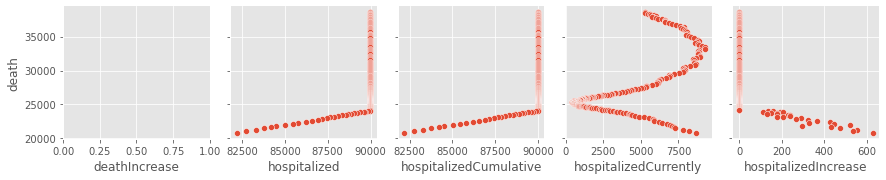

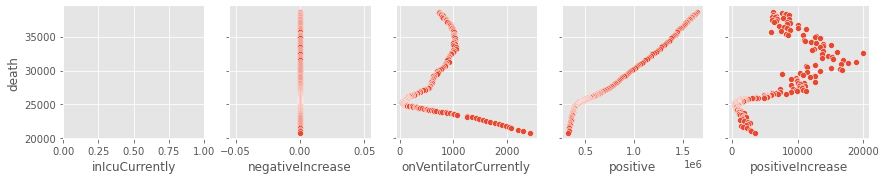

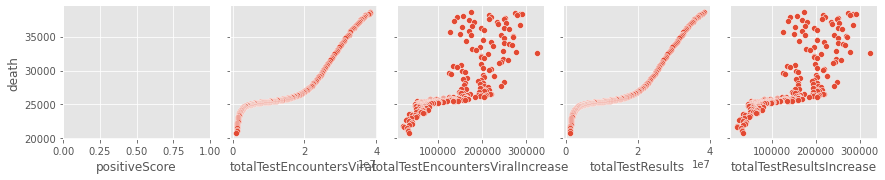

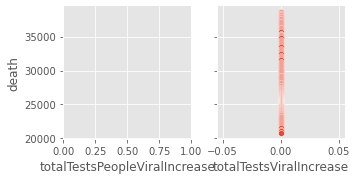

In [33]:
for i in range(1, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['death'])

We observe that there are no outliers in each feature. Some columns such as hospitalized increase may have a correlation with death if the 0 values are removed but most of the data here is 0. Signifying that the 0 values are not outliers.

## Sources

- [What is Data Analytics?](https://www.mastersindatascience.org/learning/what-is-data-analytics/)
- [A beginners guide to data science pipelin](https://towardsdatascience.com/a-beginners-guide-to-the-data-science-pipeline-a4904b2d8ad3)
- [Exploratory Data Analysis](https://www.ibm.com/cloud/learn/exploratory-data-analysis)